In [2]:
%matplotlib notebook

In [3]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [4]:
#loading and reading the csv file
crimes_csv = "../toronto-crime-analysis/crimes_csv.csv"
crimes_pd = pd.read_csv(crimes_csv)
crimes_pd['occurrencedate'] = pd.to_datetime(crimes_pd['occurrencedate'], unit = 'ms')
#crimes_pd['reporteddate'] = pd.to_datetime(crimes_pd['reporteddate'], unit='ms')
crimes_pd.head()

,Unnamed: 0,Hood_ID,Index_,MCI,Neighbourhood,event_unique_id,occurrencedate,occurrenceday,occurrencedayofweek,occurrencedayofyear,occurrencehour,occurrencemonth,occurrenceyear,offence,premisetype
0,0,84,976,Assault,Little Portugal (84),GO-2015942420,2014-01-01 05:00:00,1,Wednesday,1,0,January,2014,Assault,Apartment
1,1,25,977,Assault,Glenfield-Jane Heights (25),GO-20162295518,2014-01-01 05:00:00,1,Wednesday,1,0,January,2014,Assault,Apartment
2,2,71,978,Assault,Cabbagetown-South St.James Town (71),GO-20142458487,2014-01-01 05:00:00,1,Wednesday,1,0,January,2014,Assault,Apartment
3,3,71,979,Assault,Cabbagetown-South St.James Town (71),GO-20142458487,2014-01-01 05:00:00,1,Wednesday,1,0,January,2014,Assault,Apartment
4,4,58,980,Theft Over,Old East York (58),GO-20141573896,2014-01-01 05:00:00,1,Wednesday,1,0,January,2014,Theft Over,House


In [5]:
#
highest_crime_rates_count = crimes_pd.groupby('Neighbourhood').size()
highest_crime_rates = highest_crime_rates_count.to_frame().reset_index()
highest_crime_rates = highest_crime_rates.rename(columns= {0: 'Crime Count'})
highest_crime_rates = highest_crime_rates.sort_values(by = ['Crime Count'], ascending = False)
highest_crime_rates.Neighbourhood = highest_crime_rates.Neighbourhood.str.replace('[0-9]', '')
highest_crime_rates.Neighbourhood = highest_crime_rates.Neighbourhood.str.replace('(', '')
highest_crime_rates.Neighbourhood = highest_crime_rates.Neighbourhood.str.replace(')', '')
highest_crime_rates.head()

,Neighbourhood,Crime Count
23,Church-Yonge Corridor,4685
122,Waterfront Communities-The Island,4328
124,West Humber-Clairville,3264
6,Bay Street Corridor,2732
79,Moss Park,2637


<IPython.core.display.Javascript object>


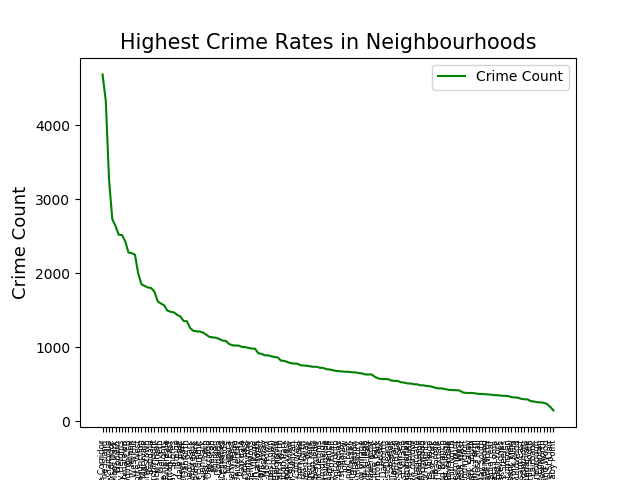

In [6]:
plt.plot(highest_crime_rates['Neighbourhood'], highest_crime_rates['Crime Count'], color='green')
    
plt.legend(loc="best")
plt.title('Highest Crime Rates in Neighbourhoods', fontsize = 15)
plt.xlabel('Neighbourhood', fontsize = 13)
plt.ylabel('Crime Count', fontsize = 13)
plt.xticks(rotation='vertical', fontsize = 6)
plt.savefig('../toronto-crime-analysis/Highest Crime Rates in Neighbourhoods')
plt.show()